<p><font size="6"><b>Spatiale bewerkingen: aanmaken van nieuwe geometriën</b></font></p>



> *GCCA+ phase 2 - Geopyhton training*  
> *June, 2023*
>
> *© 2023, Jasper Feyen  (<mailto:jasperfeyen@hotmail.com>)*
---

In het vorige notebook hebben we gezien hoe we ruimtelijke relaties tussen geometrieën kunnen identificeren en gebruiken. In deze noteboek creeëren we nieuwe geometrieën op basis van die relaties.

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

C:\Users\jaspe\AppData\Local\Temp\ipykernel_2100\3836784511.py:2: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


In [2]:
countries = geopandas.read_file("data/ne_10m_admin_0_countries.zip")
cities = geopandas.read_file("data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("data/ne_50m_rivers_lake_centerlines.zip")

In [3]:
# defining the same example geometries as in the previous notebook
suriname = countries.loc[countries['name'] == 'Suriname', 'geometry'].item()
paramaribo = cities.loc[cities['name'] == 'Paramaribo', 'geometry'].item()

## Spatial operations

Next to the spatial predicates that return boolean values, Shapely and GeoPandas also provide operations that return new geometric objects.

**Binary operations:**

<table><tr>
<td> <img src="../img/spatial-operations-base.png"/> </td>
<td> <img src="../img/spatial-operations-intersection.png"/> </td>
</tr>
<tr>
<td> <img src="../img/spatial-operations-union.png"/> </td>
<td> <img src="../img/spatial-operations-difference.png"/> </td>
</tr></table>

**Buffer:**

<table><tr>
<td> <img src="../img/spatial-operations-buffer-point1.png"/> </td>
<td> <img src="../img/spatial-operations-buffer-point2.png"/> </td>
</tr>
<tr>
<td> <img src="../img/spatial-operations-buffer-line.png"/> </td>
<td> <img src="../img/spatial-operations-buffer-polygon.png"/> </td>
</tr></table>


See https://shapely.readthedocs.io/en/stable/manual.html#spatial-analysis-methods for more details.

For example, using the toy data from above, let's construct a buffer around Brussels (which returns a Polygon):

<AxesSubplot:>

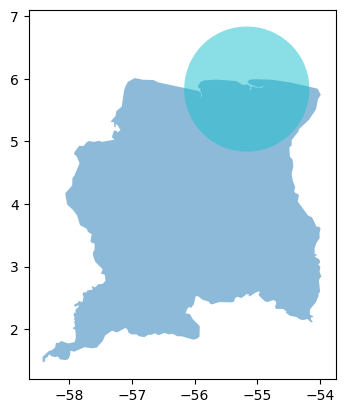

In [4]:
geopandas.GeoSeries([suriname, paramaribo.buffer(1)]).plot(alpha=0.5, cmap='tab10')

and now take the intersection, union or difference of those two polygons:

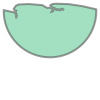

In [5]:
paramaribo.buffer(1).intersection(suriname)

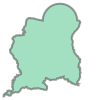

In [6]:
paramaribo.buffer(1).union(suriname)

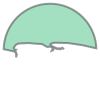

In [7]:
paramaribo.buffer(1).difference(suriname)

## *Dissolve*


Met de `dissolve()` methode, kun je verschillende geometriën laten samensmelten, op basis van een gemeenschappelijke kolomattribuut. Zo kunnen we bijvoorbeeld alle landen binnen hetzelfde continent samenvoegen tot één feature. Hierbij wordt beroep gedaan op de *groupby* van pandas. Het argument *aggfunc* bepaalt hoe de verschillende kolommen worden samengesmolten. In dit geval nemen we bijvoorbeeld de som van de populatie.

In [24]:
continents = countries.dissolve(by="continent")

In [25]:
continents

,geometry,name,iso_a3,pop_est,gdp_md_est
continent,,,,,
Africa,"MULTIPOLYGON (((-16.14501 11.02896, -16.18847 ...",Algeria,DZA,43053054.0,171091
Antarctica,"MULTIPOLYGON (((-171.82051 -82.82464, -169.030...",Antarctica,ATA,4490.0,898
Asia,"MULTIPOLYGON (((-27.13683 -59.43719, -27.15294...",Japan,JPN,126264931.0,5081769
Europe,"MULTIPOLYGON (((-144.33837 -27.63372, -144.339...",Republic of Serbia,SRB,6944975.0,51475
North America,"MULTIPOLYGON (((-168.16157 -14.53289, -168.173...",The Bahamas,BHS,389482.0,13578
Oceania,"MULTIPOLYGON (((-176.16950 -44.22112, -176.145...",New Zealand,NZ1,4917000.0,206928
Seven seas (open ocean),"MULTIPOLYGON (((57.39926 -20.49798, 57.37810 -...",Mauritius,MUS,1265711.0,14048
South America,"MULTIPOLYGON (((-75.16242 -51.57317, -75.21540...",Brazilian Island,BRI,0.0,0


<div class="alert alert-info" style="font-size:120%">

**ONTHOUD**:

GeoPandas (en Shapely voor de individuele objecten) bieden een hele reeks basismethoden om georuimtelijke gegevens te analyseren (afstand, lengte, zwaartepunt, grens, convex_hull, vereenvoudigen, transformeren, ...), veel meer dan wat we in deze training kunnen behandelen.

Een overzicht van alle methoden die door GeoPandas worden geleverd, is te vinden op: https://geopandas.org/en/latest/docs/reference.html


</div>

## Overlay operation

Bij een ruimtelijke samenvoeging (spatial join) veranderen we de geometrieën zelf niet. We voegen geen geometrieën samen, maar voegen attributen samen op basis van een ruimtelijke relatie tussen de geometrieën. Dit betekent ook dat de geometrieën minstens gedeeltelijk moeten overlappen.

Als je nieuwe geometrieën wilt maken op basis van het samenvoegen (combineren) van geometrieën van verschillende dataframes in één nieuw dataframe (bijvoorbeeld door de intersectie van de geometrieën te nemen), dan heb je een **overlay**-bewerking nodig.

### Verschil tussen intersection en overlay

Met de `intersection()` methode uit vorig hoofdstuk kunnen we bijvoorbeeld de intersectie tussen een groep landen en een 2e polygoon bepalen, zoals hieronder te zien is 
<img width="70%" src="../img/geopandas/chapter3-overlay-countries-circle-intersection-new.png"/>

Maar deze methode (`countries.intersection(circle)`) heeft echter ook zijn nadelen:

* Het is bruikbaar bij een intersectie tussen een GeoSeries/GeoDataFrame en een enkele polygoon
* De attributen afkomstig van de overlappende polygoon wordt niet behouden

Waar er dus een beetje meer complexiteit is, dan is de "overlay" operatie te verkiezen boven de intersectie.

Laten we het volgende vereenvoudigde voorbeeld eens bekijken. Aan de linkerkant zien we opnieuw de 3 landen. Aan de rechterkant hebben we de weergave van een GeoDataFrame met enkele vereenvoudigde geologische regio's voor hetzelfde gebied:

<table width="80%"><tr>
<td> <img src="../img/geopandas/chapter3-overlay-countries.png"/> </td>
<td> <img src="../img/geopandas/chapter3-overlay-regions.png"/> </td>
</tr></table>
Door ze eenvoudigweg op elkaar te plotten, zoals hieronder weergegeven, is te zien dat de polygonen van beide lagen elkaar overlappen.

Maar door de twee lagen "te overlayen" kunnen we een derde laag creëren die het resultaat bevat van het snijden van beide lagen: namelijk alle gebieden waarin zowel elk land als elke geologische regio overlappen. Alleen de gebieden die in beide lagen voorkomen, worden behouden.

<table width="80%"><tr>
<td> <img src="../img/geopandas/chapter3-overlay-both.png"/> </td>
<td> <img src="../img/geopandas/chapter3-overlay-overlayed.png"/> </td>
</tr></table>

Deze operatie is een 'intersection'-overlay, die we in geopandas met de `geopandas.overlay()` functie kunnen aanspreken.

Een ander voorbeeld

In [26]:
africa = countries[countries['continent'] == 'Africa']

<AxesSubplot:>

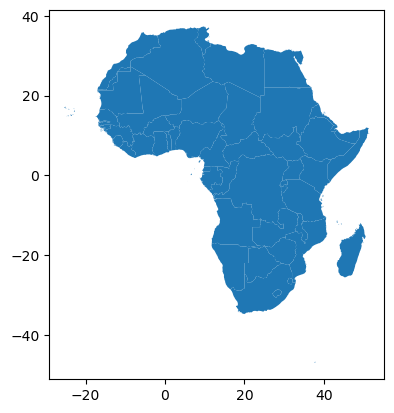

In [27]:
africa.plot()

In [28]:
cities['geometry'] = cities.buffer(2)

C:\Users\jaspe\AppData\Local\Temp\ipykernel_2100\1163649495.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cities['geometry'] = cities.buffer(2)


<AxesSubplot:>

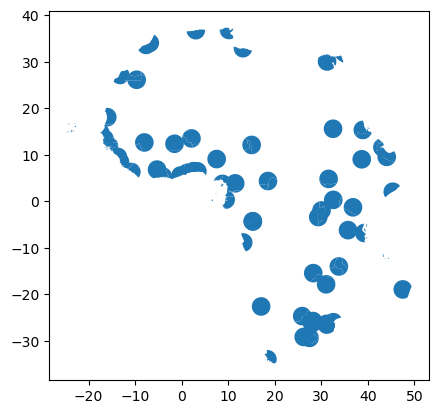

In [29]:
intersection = geopandas.overlay(africa, cities, how='intersection')
intersection.plot()

In [30]:
intersection.head()

,name_1,iso_a3,pop_est,gdp_md_est,continent,name_2,geometry
0,Algeria,DZA,43053054.0,171091,Africa,Bir Lehlou,"POLYGON ((-8.68239 27.28542, -8.68089 27.86573..."
1,Morocco,MAR,36471769.0,119700,Africa,Bir Lehlou,"POLYGON ((-8.77339 27.46003, -8.80171 27.36042..."
2,Western Sahara,SAH,603253.0,907,Africa,Bir Lehlou,"POLYGON ((-8.68239 27.66144, -8.68766 26.00002..."
3,Mauritania,MRT,4525696.0,7600,Africa,Bir Lehlou,"POLYGON ((-7.75254 26.73858, -7.73864 26.69974..."
4,Algeria,DZA,43053054.0,171091,Africa,Tunis,"MULTIPOLYGON (((8.23316 36.95808, 8.28810 36.9..."


Met de overlay-methode geven we de volledige GeoDataFrame mee met alle regio's om de landen mee te snijden. Het resultaat bevat alle niet-lege snijpunten van alle combinaties van landen en stadsregio's.

Merk op dat het resultaat van de overlay-functie ook de attribuutinformatie van zowel de landen als de stadsregio's behoudt. Dat kan zeer nuttig zijn voor verdere analyse.

<AxesSubplot:>

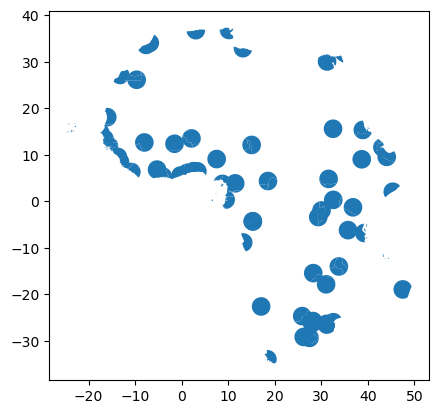

In [31]:
geopandas.overlay(africa, cities, how='intersection').plot()  # how="difference"/"union"/"symmetric_difference"

C:\Users\jaspe\anaconda3\envs\GCCA-Geopython\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


<AxesSubplot:>

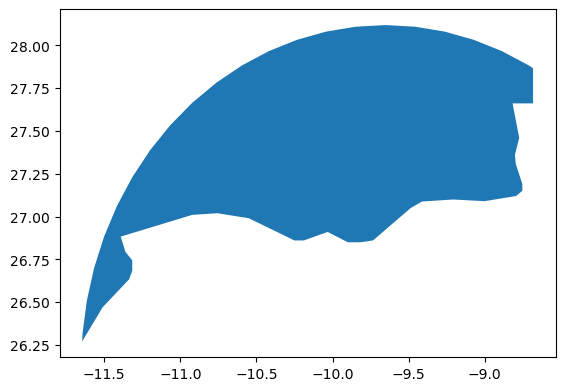

In [36]:
# Indien we dit met de intersection methode hadden opgelost:
africa.intersection(cities).plot()

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b> <br>

* **Spatial join**: overdragen van attributen van het ene dataframe naar het andere op basis van de ruimtelijke relatie

* **Spatial overlay**: construeren van nieuwe geometrieën op basis van ruimtelijke bewerkingen tussen beide dataframes (en het combineren van attributen van beide dataframes).
</div>

## OEFENINGEN

<div class="alert alert-success">

**EXERCISE 6: Overlaying spatial datasets I**

We will now combine both datasets in an overlay operation. Create a new `GeoDataFrame` consisting of the intersection of the land use polygons which each of the districts, but make sure to bring the attribute data from both source layers.

* Create a new GeoDataFrame from the intersections of `land_use` and `districts`. Assign the result to a variable `combined`.
* Print the first rows the resulting GeoDataFrame (`combined`).

<details><summary>Hints</summary>

* The intersection of two GeoDataFrames can be calculated with the `geopandas.overlay()` function.
* The `overlay()` functions takes first the two GeoDataFrames to combine, and a third `how` keyword indicating how to combine the two layers.
* For making an overlay based on the intersection, you can pass `how='intersection'`.
* The default `overlay()` call will generate a warning because some of the intersections result in a point or linestring, and thus not in a new polygon. For this exercise, we are only interested in the resulting polygons, and therefore we set `keep_geom_type=True` to suppress the warning and say to `overlay()` we only need the resulting geometries of the same type as the original geometries (thus, only polygons).

</details>

</div>

In [ ]:
land_use = geopandas.read_file("data/paris_land_use.zip")
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(land_use.crs)

In [ ]:
# %load _solutions/05-spatial-operations-overlays21.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays22.py

<div class="alert alert-success">

**EXERCISE 7: Overlaying spatial datasets II**

Now that we created the overlay of the land use and districts datasets, we can more easily inspect the land use for the different districts. Let's get back to the example district of Muette, and inspect the land use of that district.

* Add a new column `'area'` with the area of each polygon to the `combined` GeoDataFrame.
* Create a subset called `land_use_muette` where the `'district_name'` is equal to "Muette".
* Make a plot of `land_use_muette`, using the `'class'` column to color the polygons.
* Calculate the total area for each `'class'` of `land_use_muette` using the `groupby()` method, and print the result.

<details><summary>Hints</summary>

* The area of each geometry can be accessed with the `area` attribute of the `geometry` of the GeoDataFrame.
* To use a column to color the geometries, pass its name to the `column` keyword.
* The `groupby()` method takes the column name on which you want to group as the first argument.
* The total area for each class can be calculated by taking the `sum()` of the area.

</details>

</div>

In [ ]:
# %load _solutions/05-spatial-operations-overlays23.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays24.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays25.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays26.py

<div class="alert alert-success">

**EXERCISE 8: Overlaying spatial datasets III**

Thanks to the result of the overlay operation, we can now more easily perform a similar analysis for *all* districts. Let's investigate the fraction of green urban area in each of the districts.

* Based on the `combined` dataset, calculate the total area per district using `groupby()`.
* Select the subset of "Green urban areas" from `combined` and call this `urban_green`.
* Now calculate the total area per district for this `urban_green` subset, and call this `urban_green_area`.
* Determine the fraction of urban green area in each district.

</div>

In [ ]:
# %load _solutions/05-spatial-operations-overlays27.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays28.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays29.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays30.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays31.py

In [ ]:
# %load _solutions/05-spatial-operations-overlays32.py

An alternative to calculate the area per land use class in each district:

In [ ]:
combined.groupby(["district_name", "class"])["area"].sum().reset_index()